In [ ]:
import re

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
m = regex.search(text)

In [ ]:
m.start()

In [ ]:
m.end()

In [ ]:
mat = regex.match(text[5:])

In [ ]:
text[mat.start()+5:mat.end()+5]

In [ ]:
import numpy as np
from pandas import Series, DataFrame
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [ ]:
pattern

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.get(3)

In [ ]:
matches.

In [ ]:
Series.xs?

In [ ]:
%pwd

In [ ]:
import json
db = json.load(open('Pandas_Slides/ch07/foods-2011-10-03.json'))
len(db)

In [ ]:
type(db)

In [ ]:
db[0].keys()

In [ ]:
data = db[0]['nutrients']

In [ ]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info

In [ ]:
import pandas as pd
pd.value_counts(info.group)[:10]

In [ ]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

In [ ]:
nutrients.duplicated().sum()

In [ ]:
nutrients = nutrients.drop_duplicates()
nutrients.head(2)

In [ ]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

In [ ]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head(2)

In [ ]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.head()

In [ ]:
npivot = ndata.pivot_table(values='value', 
                  index=['nutgroup', 'nutrient'], 
                  columns=['fgroup', 'food'], 
                 aggfunc='mean')
npivot

In [ ]:
grouped= ndata.groupby(['nutrient', 'fgroup'])
grouped['value'].mean()

In [ ]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result

In [ ]:
import matplotlib.pyplot as plt
result['Zinc, Zn'].sort_values().plot(kind='barh'); plt.show()

In [ ]:
DataFrame.plot?

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

In [ ]:
grouped = dup_ts.groupby(level=0)

리샘플링 연습<br>
AAP.csv 파일을 datetime index를 가진 DataFrame으로 읽어들인 후 
* 매주 수요일 단위로 리샘플링
* 특정 월의 데이터를 색인 후 4시간의 주기로 리샘플링

In [15]:
import pandas as pd
aapl = pd.read_csv('AAP.csv', index_col=[0], parse_dates=True)

In [14]:
pd.read_csv?

In [29]:
aapl.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-12,101.709999,105.559998,101.709999,103.029999,102.832932,2442400
2017-12-13,103.629997,103.720001,101.860001,102.500000,102.303940,1093100


In [30]:
aapl.index

DatetimeIndex(['2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-26',
               ...
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-03', '2018-12-04', '2018-12-06', '2018-12-07',
               '2018-12-10', '2018-12-11'],
              dtype='datetime64[ns]', name=u'Date', length=251, freq=None)

In [19]:
len(aapl)

251

In [32]:
aapl.resample('W-WED').last()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-13,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-20,100.029999,100.910004,98.029999,98.589996,98.401413,1081700
2017-12-27,101.720001,101.720001,99.400002,99.769997,99.639793,988500
2018-01-03,106.419998,107.660004,105.300003,107.050003,106.910301,2086800
2018-01-10,110.269997,112.000000,109.790001,110.589996,110.445671,711200
2018-01-17,114.739998,116.239998,112.980003,115.349998,115.199463,1349400
2018-01-24,119.260002,121.239998,118.260002,120.989998,120.832100,1198600
2018-01-31,119.860001,120.470001,115.830002,116.989998,116.837326,1235700
2018-02-07,112.089996,114.580002,109.900002,109.930000,109.786537,2163500


In [35]:
aapl.resample('4h').bfill()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-12 00:00:00,101.709999,105.559998,101.709999,103.029999,102.832932,2442400
2017-12-12 04:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-12 08:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-12 12:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-12 16:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-12 20:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-13 00:00:00,103.629997,103.720001,101.860001,102.500000,102.303940,1093100
2017-12-13 04:00:00,103.230003,103.900002,99.769997,100.199997,100.008339,1111400
2017-12-13 08:00:00,103.230003,103.900002,99.769997,100.199997,100.008339,1111400


In [36]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [40]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [50]:
import numpy as np
from pandas import Series, DataFrame
idx = pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')
ts = Series(np.random.randn(len(idx)), index=idx)

In [51]:
ts.index.tz

<UTC>

In [52]:
ts[:3]

2012-03-09 09:30:00+00:00   -0.989746
2012-03-10 09:30:00+00:00   -0.157137
2012-03-11 09:30:00+00:00    1.492862
Freq: D, dtype: float64

In [54]:
ts.index.tz_convert('Asia/Seoul')

DatetimeIndex(['2012-03-09 18:30:00+09:00', '2012-03-10 18:30:00+09:00',
               '2012-03-11 18:30:00+09:00', '2012-03-12 18:30:00+09:00',
               '2012-03-13 18:30:00+09:00', '2012-03-14 18:30:00+09:00',
               '2012-03-15 18:30:00+09:00', '2012-03-16 18:30:00+09:00',
               '2012-03-17 18:30:00+09:00', '2012-03-18 18:30:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='D')

In [56]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
display(rng)
ts

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [57]:
display(rng.asfreq('B', 'e'))
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 # Begin->end, Minute->second 변경
new_rng

PeriodIndex(['2010-10-29', '2011-01-31', '2011-04-29', '2011-07-29',
             '2011-10-31', '2012-01-31'],
            dtype='period[B]', freq='B')

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

1. 야후 파이낸스 사이트에서 AAPL(애플)과 AMZN(아마존)의 주가 정보를 2016년1월1일~현재까지 Daily로 수집한다.
2. 두 데이터를 apple과 amazon이라는 열로 이어붙여서 stock이라는 DataFrame으로 만든다.
3. 각 데이터의 이동평균 그래프를 그린다. (window size=60)
4. 두 데이터 사이의 상관관계 그래프를 그린다. (window size=60)

In [60]:
aapl= pd.read_csv('AAPL.csv', index_col=0, parse_dates=True)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,151.259995,151.940002,150.449997,150.509995,149.765991,766700
2016-01-04,149.250000,154.479996,147.509995,152.240005,151.487503,1935300
2016-01-05,152.350006,153.789993,149.889999,151.199997,150.452637,1127700
2016-01-06,149.679993,150.050003,145.779999,147.199997,146.472382,1048400
2016-01-07,144.800003,149.460007,143.130005,148.830002,148.094330,1343700


In [61]:
amzn = pd.read_csv('AMZN.csv', index_col=0, parse_dates=True)

In [63]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,686.080017,687.750000,675.890015,675.890015,675.890015,3749600
2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314500
2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822600
2016-01-06,622.000000,639.789978,620.309998,632.650024,632.650024,5329200
2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074900


In [107]:
stock = pd.concat([aapl.Close, amzn.Close], axis=1, keys=['apple', 'amazon'])
stock.head()

,apple,amazon
Date,,
2015-12-31,150.509995,675.890015
2016-01-04,152.240005,636.989990
2016-01-05,151.199997,633.789978
2016-01-06,147.199997,632.650024
2016-01-07,148.830002,607.940002


In [83]:
returns = stock.pct_change()

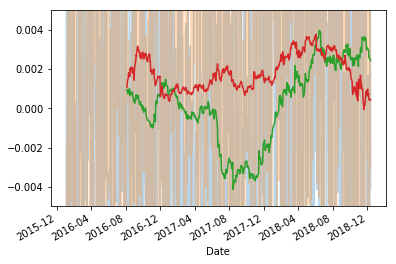

In [110]:
import matplotlib.pyplot as plt
returns.apple.plot(alpha=0.3)
returns.amazon.plot(alpha=0.3)
returns.apple.rolling(window=150, center=False).mean().plot()
returns.amazon.rolling(window=150, center=False).mean().plot()
plt.ylim(-0.005, 0.005)
plt.show()

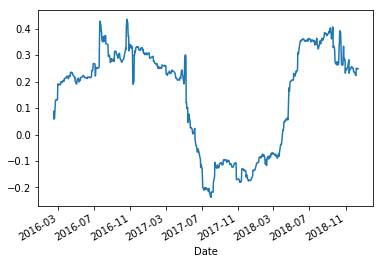

In [111]:
apple_amazon = returns.apple.rolling(window=120, min_periods=30).corr(returns.amazon)
apple_amazon.plot(); plt.show()

In [68]:
df = DataFrame({'B': [0, 1, 2, np.nan, 4]})

In [69]:
display(df)
df.rolling(2).sum()

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN
